In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

In [5]:
path = "results/"
results = {}
# go through each folder and load all results '.npy' files
for folder in os.listdir(path):
    results[folder] = {}
    for file in os.listdir(path + folder):
        results[folder][file[:-4]] = np.load(path + folder + "/" + file)

----------------------------------------
Analysing metric: CF_distance
Analysing 4 methods


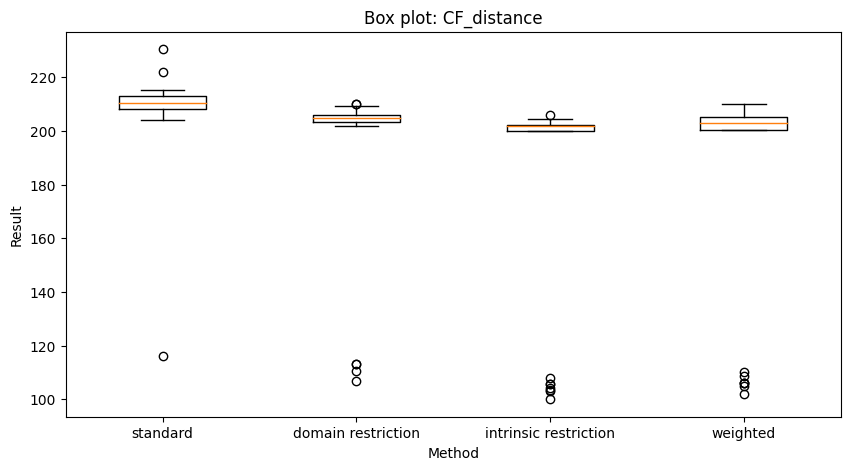

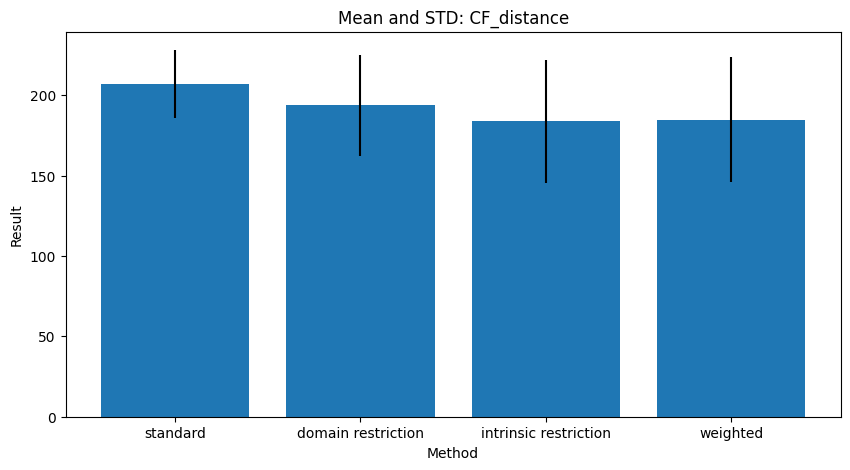

Average and standard deviation of each method:
standard : 206.9572486772487 21.068717968854966
domain restriction : 193.5809027777778 31.367369393815586
intrinsic restriction : 183.6068168168168 38.36755481923433
weighted : 184.77163580246915 38.626860062364784
----------------------------------------
Analysing metric: CF_distance_weighted
Analysing 4 methods


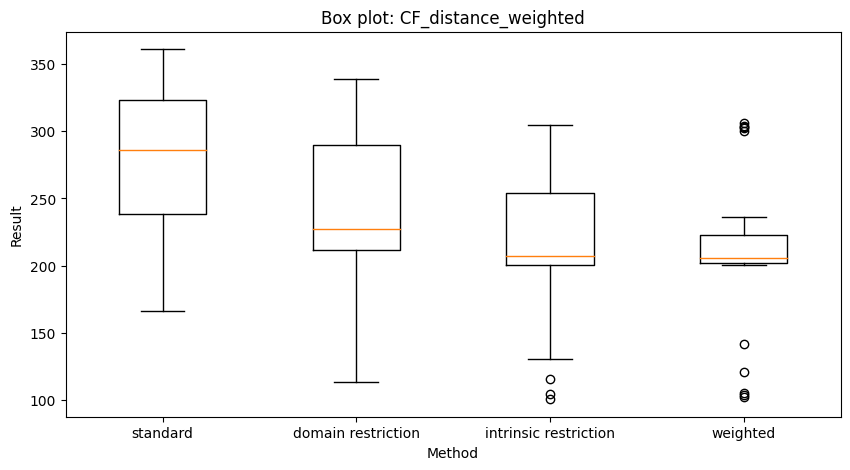

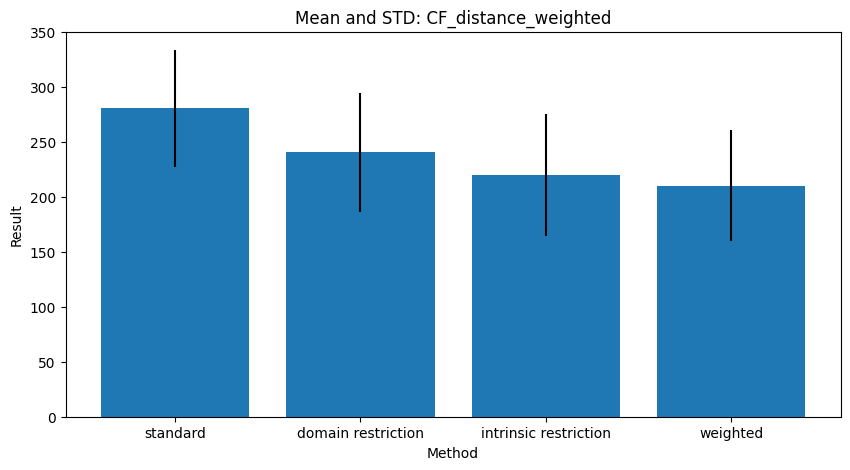

Average and standard deviation of each method:
standard : 280.6897760630637 52.99564969378314
domain restriction : 240.46847074913438 54.408266553470284
intrinsic restriction : 219.74717016654452 55.36505202492298
weighted : 210.38372691924857 50.92243753006534
----------------------------------------
Analysing metric: misfit
Analysing 4 methods


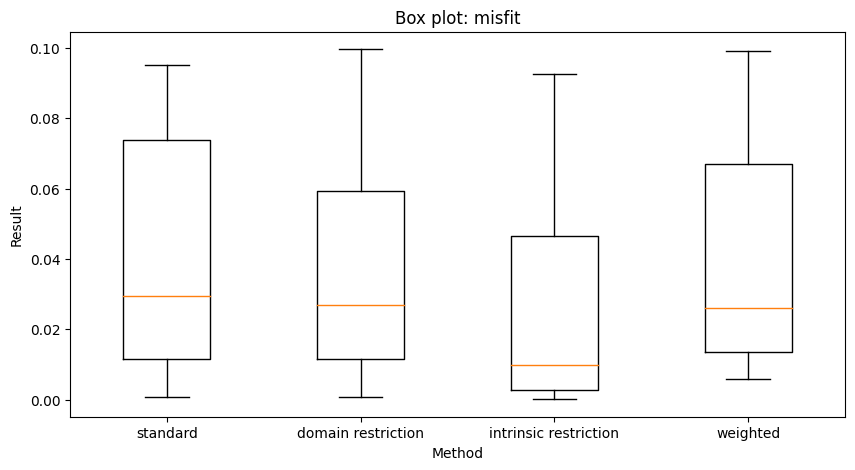

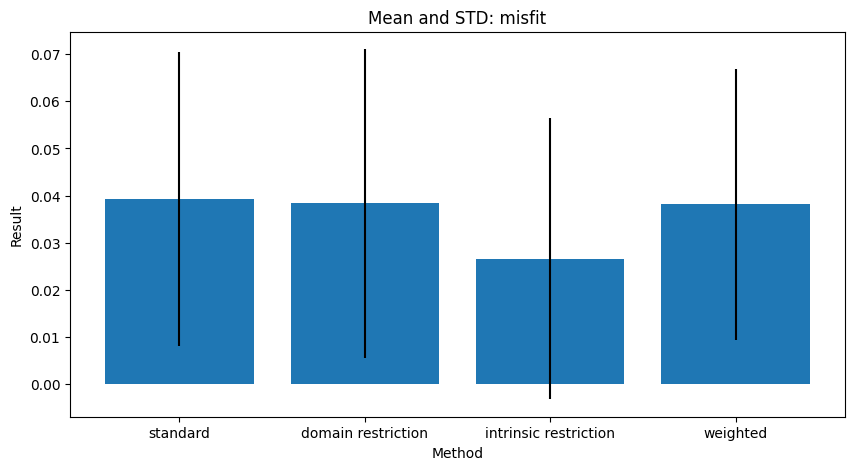

Average and standard deviation of each method:
standard : 0.0392463805229416 0.03128920204917785
domain restriction : 0.038303621419104046 0.03277214946102152
intrinsic restriction : 0.026589735066625774 0.029863633093539885
weighted : 0.038121248815841086 0.0287386601016054
----------------------------------------
Analysing metric: sparsity
Analysing 4 methods


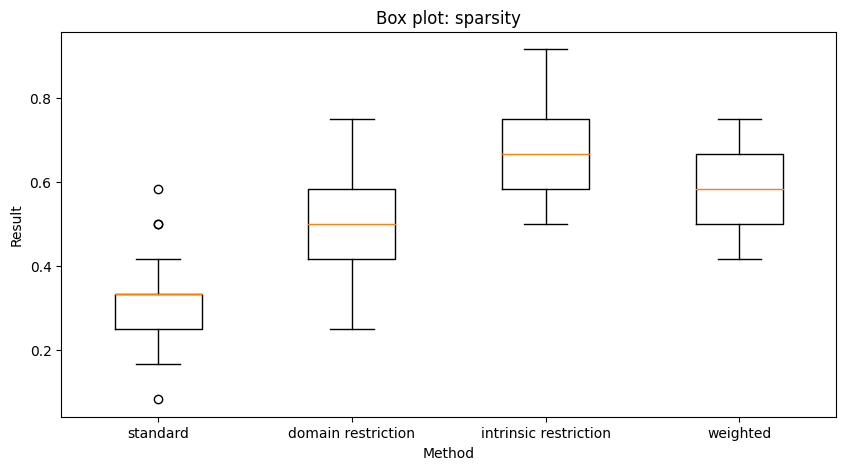

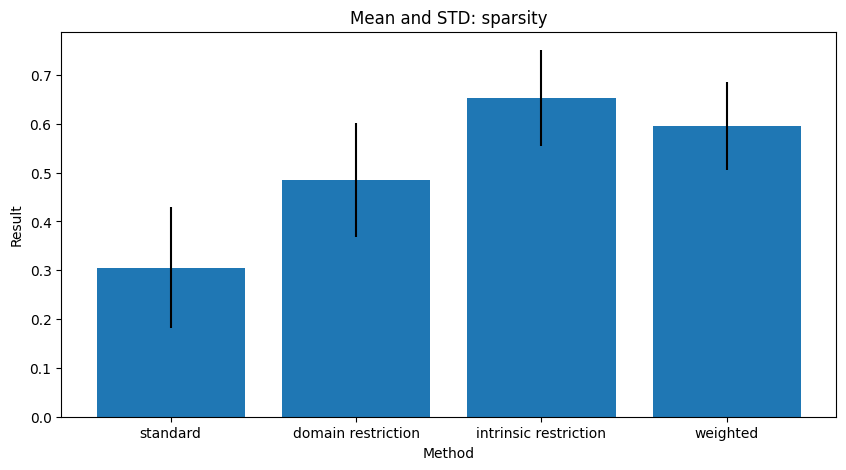

Average and standard deviation of each method:
standard : 0.30555555555555564 0.12422599874998833
domain restriction : 0.484375 0.11681073693753025
intrinsic restriction : 0.6531531531531531 0.09786288730811005
weighted : 0.5949074074074073 0.09033711250503637


In [6]:
# each key in results represents a metric, analyse each one with same code
def analyse_metric(data, name):
    # Define custom order
    custom_order = ["standard", "domain restriction", "intrinsic restriction", "weighted"]

    # Sort the dictionary keys based on the custom order
    sorted_keys = sorted(data.keys(), key=lambda x: custom_order.index(x))

    # count how many methods that was used
    methods = len(data)
    print(f"Analysing {methods} methods")

    # box plot each method
    plt.figure(figsize=(10, 5))
    plt.title("Box plot: " + name)
    plt.xlabel("Method")
    plt.ylabel("Result")
    plt.boxplot([data[key] for key in sorted_keys])
    plt.xticks(range(1, methods + 1), sorted_keys)
    plt.show()

    # plot average and standard deviation of each method
    plt.figure(figsize=(10, 5))
    plt.title("Mean and STD: " + name)
    plt.xlabel("Method")
    plt.ylabel("Result")
    plt.bar(range(1, methods + 1), [np.mean(data[key]) for key in sorted_keys], yerr=[np.std(data[key]) for key in sorted_keys])
    plt.xticks(range(1, methods + 1), sorted_keys)
    plt.show()

    # print average and standard deviation of each method
    print("Average and standard deviation of each method:")
    for key in sorted_keys:
        print(key, ":", np.mean(data[key]), np.std(data[key]))


# analyse each metric
for key, value in results.items():
    print("-"*40)
    print("Analysing metric:", key)
    analyse_metric(value, key)